In [2]:
# hierarchy cluster

# agglomerative algorithm: 
# 1. single linkage
# 2. complete linkage
# 3. average linkage
# 4. Ward linkage

# complete linkage
import pandas as pd
import numpy as np

# set up random data
np.random.seed(123)
variables = ['A', 'B', 'C', 'D']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 4]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
print(df)

             A         B         C         D
ID_0  6.964692  2.861393  2.268515  5.513148
ID_1  7.194690  4.231065  9.807642  6.848297
ID_2  4.809319  3.921175  3.431780  7.290497
ID_3  4.385722  0.596779  3.980443  7.379954
ID_4  1.824917  1.754518  5.315514  5.318276


In [3]:
# compute distance matrix
from scipy.spatial.distance import pdist, squareform

dist_vector = pdist(df, metric='euclidean')
symmetry_dist_matrix = pd.DataFrame(squareform(dist_vector), columns=labels, index=labels)
print('distance vector: \n', dist_vector, '\n')
print('symmetry distance matrix: \n', symmetry_dist_matrix)

distance vector: 
 [7.78138585 3.20638852 4.26558613 6.0798549  6.82884905 7.43890053
 7.58207906 3.39706892 4.58684723 3.73242731] 

symmetry distance matrix: 
           ID_0      ID_1      ID_2      ID_3      ID_4
ID_0  0.000000  7.781386  3.206389  4.265586  6.079855
ID_1  7.781386  0.000000  6.828849  7.438901  7.582079
ID_2  3.206389  6.828849  0.000000  3.397069  4.586847
ID_3  4.265586  7.438901  3.397069  0.000000  3.732427
ID_4  6.079855  7.582079  4.586847  3.732427  0.000000


           label 1  label 2  distance  length of cluster
cluster 1      0.0      2.0  3.206389                2.0
cluster 2      3.0      4.0  3.732427                2.0
cluster 3      5.0      6.0  6.079855                4.0
cluster 4      1.0      7.0  7.781386                5.0


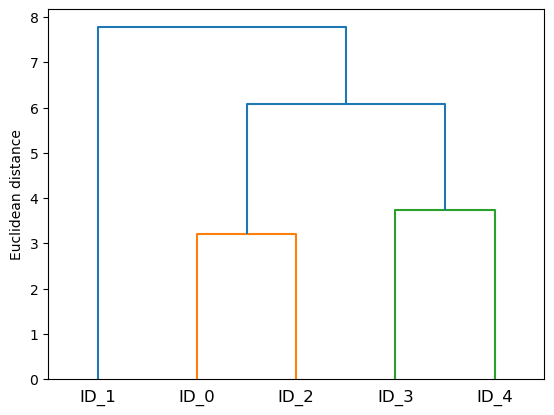

In [4]:
# construct cluster by complete linkage method
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

clusters = linkage(dist_vector, method='complete')

# visualize clusters with tree map
cluster_pd = pd.DataFrame(clusters, columns=['label 1', 'label 2', 'distance', 'length of cluster'], 
                          index=['cluster %d' % (i+1) for i in range(clusters.shape[0])])
cluster_gram = dendrogram(clusters, labels=labels)

print(cluster_pd)
plt.ylabel('Euclidean distance')
plt.show()  # we can see the nearest cluster is 'ID_0 - ID_2' then 'ID_3 - ID_4'

C:\Users\12923\AppData\Local\Temp\ipykernel_21464\219464767.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  heat.set_xticklabels([''] + list(sorted_gram.columns))
C:\Users\12923\AppData\Local\Temp\ipykernel_21464\219464767.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  heat.set_yticklabels([''] + list(sorted_gram.index))


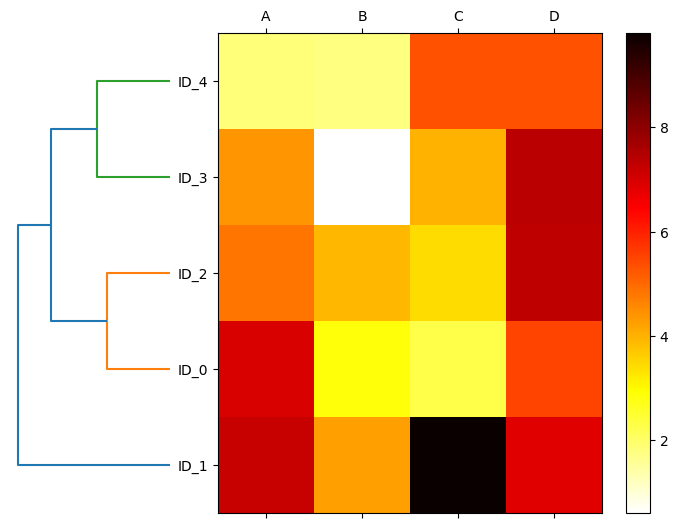

In [5]:
# more imformative visualization: 
# heat map combined tree map

# 1. create a blank canvas
fig = plt.figure(figsize=(8, 8), facecolor='white')

# 2. create tree map and heat map on the canvas using 'add_axes'
tree = fig.add_axes([0.0, 0.1, 0.2, 0.6])  # [left, bottom, width, height]
gram = dendrogram(clusters, orientation='left')  # rotate the dendrogram 90 degree

heat = fig.add_axes([0.26, 0.1, 0.6, 0.6])
sorted_gram = df.iloc[gram['leaves'][::-1]]
map = heat.matshow(sorted_gram, interpolation='nearest', cmap='hot_r')
fig.colorbar(map)

tree.set_xticks([])
tree.set_yticks([])
for i in tree.spines.values():
    i.set_visible(False)

heat.set_xticklabels([''] + list(sorted_gram.columns))
heat.set_yticklabels([''] + list(sorted_gram.index))
plt.show()

In [6]:
# using scikit-learn
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels_3 = ac.fit_predict(X)

ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels_2 = ac.fit_predict(X)

print('Cluster labels(in 3): %s' % labels_3)
print('Cluster labels(in 2): %s' % labels_2)

Cluster labels(in 3): [2 1 2 0 0]
Cluster labels(in 2): [0 1 0 0 0]


c:\Users\12923\.conda\envs\env_datascience\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\12923\.conda\envs\env_datascience\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
